In [919]:
Defining Problem Statement and Analysing basic metrics

Problem statement:

To analyze Netflix's data to generate insights that could help Netflix decide which types of shows/movies to produce and 
how they can grow their business in different countries.

In [742]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

df = pd.read_csv("C:/Users/DELL/Desktop/DataSets_Kaggle/business_case_netflix.csv")

df.head() #Checking first 5 rows of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [744]:
df.info() #Cheking the columnns, their data types, and non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
Analysis based on above outputs:

The Netflix dataset comprises 8807 rows with 12 columns namely: 
show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, and description. 
And also, there are NaN (missing values) in the 'director', 'cast', 'country', 'date_added', 'rating', and 'duration' columns. 
The dataset is complete for 'show_id', 'type', 'title', 'release_year', 'listed_in', and 'description'. 
This requires data cleaning to handle missing values before conducting a in-depth analysis.

In [ ]:
Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), 
missing value detection, statistical summary.


In [746]:
df.shape #Checking the shape of the data (rows, columns)

(8807, 12)

In [748]:
df.dtypes #Checking the datatype of all columns

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [921]:
The dataset is mostly categorical with 'release_year' as the only numerical column, requiring string processing 
for most attributes and numerical analysis for 'release_year'.

In [750]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
Data Cleaning:
Data cleaning involves identifying and addressing incorrect, incomplete, inaccurate, or irrelevant data, 
and then modifying, replacing, or deleting it as necessary.

In [752]:
# The 'cast', 'director', 'listed_in', and 'country' columns contain comma-separated values that need to be expanded into individual rows for analysis.
# The following code splits these values, explodes the lists into separate rows, and trims any extra spaces.

df["cast"] = df["cast"].str.split(",")
df = df.explode("cast")
df["director"] = df["director"].str.split(",")
df = df.explode("director")
df["listed_in"] = df["listed_in"].str.split(",")
df = df.explode("listed_in")
df["country"] = df["country"].str.split(",")
df = df.explode("country")
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.shape

C:\Users\DELL\AppData\Local\Temp\ipykernel_20244\650500266.py:12: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



(202065, 12)

In [ ]:
After unnesting the comma-separated values and striping spaces, the dataset now contains 2,02,065 rows.
And the indexes are ranging from 0 to 8806.

In [754]:
df.isnull().any() #Identifying columns which consists of Null values.

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [756]:
# Imputation is a method for handling missing values by filling them in using techniques such as mean, mode, or predictive modeling. 
# In this case, we'll use the `fillna` function from Pandas for imputation.
# Several columns, including "director," "cast," "country," "duration," "rating," and "date_added," contain null values 
# that need to be addressed before proceeding with EDA and modeling. 
# The following code replaces NaN values with "Unknown <column name>".


df["cast"].fillna("Unknown Cast", inplace=True)
df["country"].fillna("Unknown Country", inplace=True)
df["duration"].fillna(0, inplace=True)
df["rating"].fillna(0, inplace=True)
df["director"].fillna("Unknown", inplace=True)
df["date_added"].fillna("Unknown", inplace=True)

In [758]:
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [832]:
# Statistical Summary
unique_rows = df.drop_duplicates(subset='show_id', keep='first')
unique_rows.describe()

,date_added,release_year
count,8797,8807.000000
mean,2019-05-17 05:59:08.436967168,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-02 00:00:00,2017.000000
75%,2020-08-19 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


In [762]:
Non-Graphical Analysis: Value counts and unique attributes


# Value counts for certain categorical columns
value_counts = {
    'Type': unique_rows['type'].value_counts(),
    'Director': unique_rows['director'].value_counts().head(),  # Showing top 10 for brevity
    'Cast': unique_rows['cast'].value_counts().head(),  # Showing top 10 for brevity
    'Country': unique_rows['country'].value_counts().head(),  # Showing top 10 for brevity
    'Listed_in': unique_rows['listed_in'].value_counts().head()  # Showing top 10 for brevity
}

# Unique attributes count
unique_counts = {
    'Show_id': df['show_id'].nunique(),
    'Type': df['type'].nunique(),
    'Title': df['title'].nunique(),
    'Director': unique_rows['director'].nunique(),
    'Cast': df['cast'].nunique(),
    'Country': df['country'].nunique(),
    'Date_added': df['date_added'].nunique(),
    'Release_year': df['release_year'].nunique(),
    'Listed_in': df['listed_in'].nunique(),
}


print("Value Counts:")
for key, value in value_counts.items():
    print(f"\n{key}:\n{value}")

print("\nUnique Counts:")
for key, value in unique_counts.items():
    print(f"{key}: {value}")

Value Counts:

Type:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Director:
director
Unknown          2634
Rajiv Chilaka      22
Raúl Campos        18
Suhas Kadav        16
Marcus Raboy       16
Name: count, dtype: int64

Cast:
cast
Unknown Cast          825
Shah Rukh Khan         26
Akshay Kumar           23
David Attenborough     20
Amitabh Bachchan       20
Name: count, dtype: int64

Country:
country
United States      3211
India              1008
Unknown Country     831
United Kingdom      628
Canada              271
Name: count, dtype: int64

Listed_in:
listed_in
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
International TV Shows     774
Name: count, dtype: int64

Unique Counts:
Show_id: 8807
Type: 2
Title: 8806
Director: 4406
Cast: 36440
Country: 124
Date_added: 1715
Release_year: 74
Listed_in: 42


In [ ]:
The dataset consists of 6131 movies and 2676 TV shows, with a significant portion of entries lacking specific director and cast information. 
The United States and India are the leading content-producing countries. Dramas and Comedies are the most common genres. 
The dataset shows high diversity in titles, directors, cast members, and countries, indicating a wide range of content and contributors.

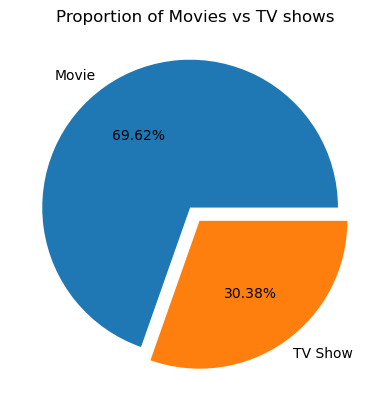

In [764]:
Visual Analysis - Univariate, Bivariate after pre-processing of the data
Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

For continuous variable(s): Distplot, countplot, histogram for univariate analysis 

#Analysing the proportion of Movies and TV shows on Netflix (upto 2021)
plt.pie(unique_rows["type"].value_counts(),
labels=unique_rows["type"].value_counts().index, autopct='%1.2f%%', explode=(0.055,0.055))
plt.title("Proportion of Movies vs TV shows")
plt.show()

In [ ]:
The pie chart indicates that TV shows make up 30.4% of the dataset, while movies make up 69.6%. 
This suggests that there is a much greater representation of movies than TV shows. 
The distribution shows that movies have a significant role in the dataset.

In [766]:
# Converting date_added columns to a proper date format
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

#Getting year wise adding Movies, TV Shows into the Netflix
year_added = df.groupby(df["date_added"].dt.year.astype("Int64"))["show_id"].nunique().sort_values(ascending=False).reset_index()
year_added.columns = ["year", "count"]

#Filtering only movies and getting number of movies added into netflix for every year
movies_df = df[df["type"]=="Movie"]
movies_year_added = movies_df.groupby(movies_df["date_added"].dt.year.astype("Int64"))["show_id"].nunique().sort_values(ascending=False).reset_index()
movies_year_added.columns = ["year", "count"]

# #Filtering only TV Shows and getting number of TV Shows added into netflix for every year
tv_shows_df = df[df["type"]=="TV Show"]
tv_shows_year_added = tv_shows_df.groupby(tv_shows_df["date_added"].dt.year.astype("Int64"))["show_id"].nunique().sort_values(ascending=False).reset_index()
tv_shows_year_added.columns = ["year", "count"]


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



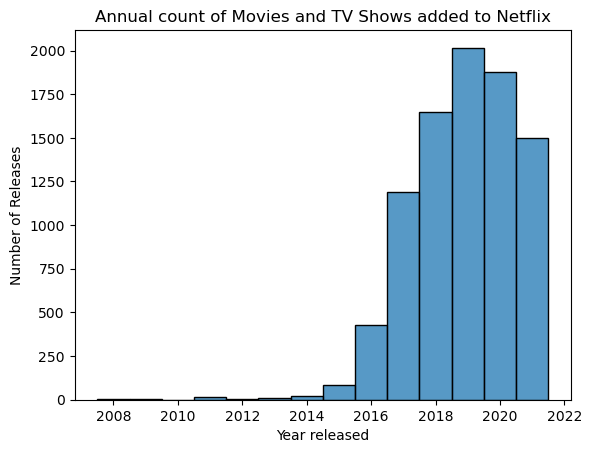

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



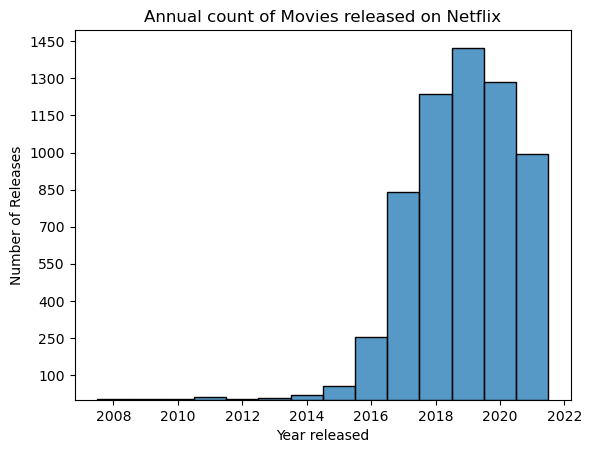

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



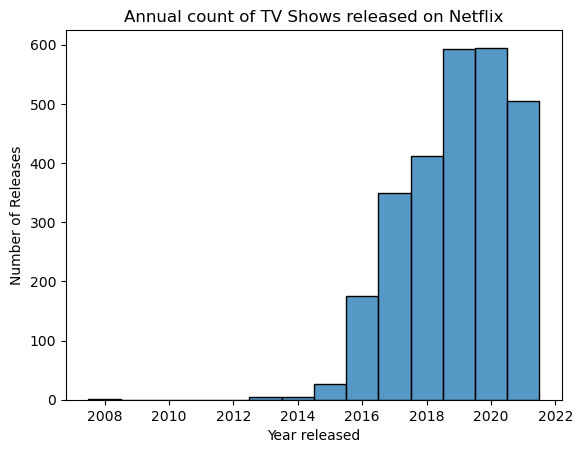

In [772]:
# Number of movies and tv shows added to Netflix on a yearly basis

sns.histplot(data=year_added, x='year', weights='count', discrete=True)
plt.title("Annual count of Movies and TV Shows added to Netflix")
plt.xlabel("Year released")
plt.ylabel("Number of Releases")
plt.show()

sns.histplot(data=movies_year_added, x="year", weights="count", discrete=True)
plt.title("Annual count of Movies released on Netflix")
plt.xlabel("Year released")
plt.ylabel("Number of Releases")
plt.yticks(range(100, 1500, 150))
plt.show()

sns.histplot(data=tv_shows_year_added, x="year", weights="count", discrete=True)
plt.title("Annual count of TV Shows released on Netflix")
plt.xlabel("Year released")
plt.ylabel("Number of Releases")
plt.show()

In [ ]:
Based on the comparison of above histograms, Netflix's growth significantly picked up speed after 2013, and the amount of new content 
it added increased yearly. 
Compared to TV series, the platform's movie section has grown dramatically, with about 1,300 new films added in just 2018 and 2019. 
This trend demonstrates Netflix's strategic emphasis on increasing its selection of movies rather than TV series.

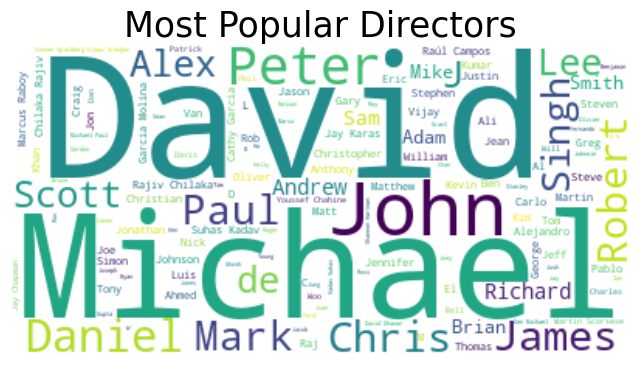

In [774]:
from wordcloud import WordCloud, ImageColorGenerator
known_directors = unique_rows[unique_rows["director"]!="Unknown"]
director_names = " ".join(known_directors.director)

wordcloud = WordCloud(max_words=200, background_color="white").generate(director_names)
plt.figure(figsize=(8,6))

plt.imshow(wordcloud, interpolation='Bilinear')
plt.title('Most Popular Directors',fontsize = 25)
plt.axis("off")
plt.show()

In [ ]:
For the above worldcloud, most of the popular directors are from outside of India.

Text(0.5, 1.0, 'Most Popular Genres on Netflix')

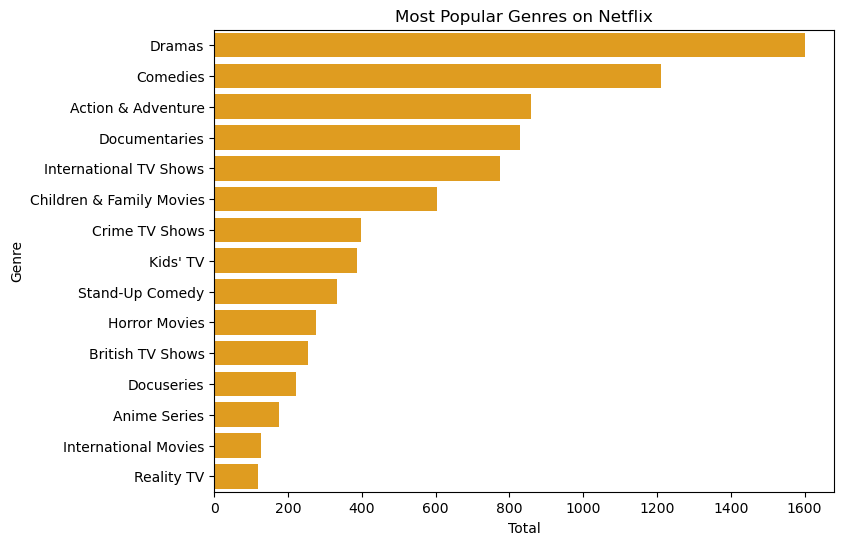

In [776]:
#Analysing top listed_in (genres) in the netflix dataset
genres = unique_rows.groupby("listed_in")["listed_in"].value_counts().sort_values(ascending=False).reset_index().head(15)

plt.figure(figsize=(8,6))
sns.barplot(data=genres, x="count", y="listed_in", color="orange")
plt.xlabel("Total")
plt.ylabel("Genre")
plt.title("Most Popular Genres on Netflix")

In [662]:
Based on the above bar graph, Dramas, Comedies, and (Action & Adventure) are the leading gneres on netflix.

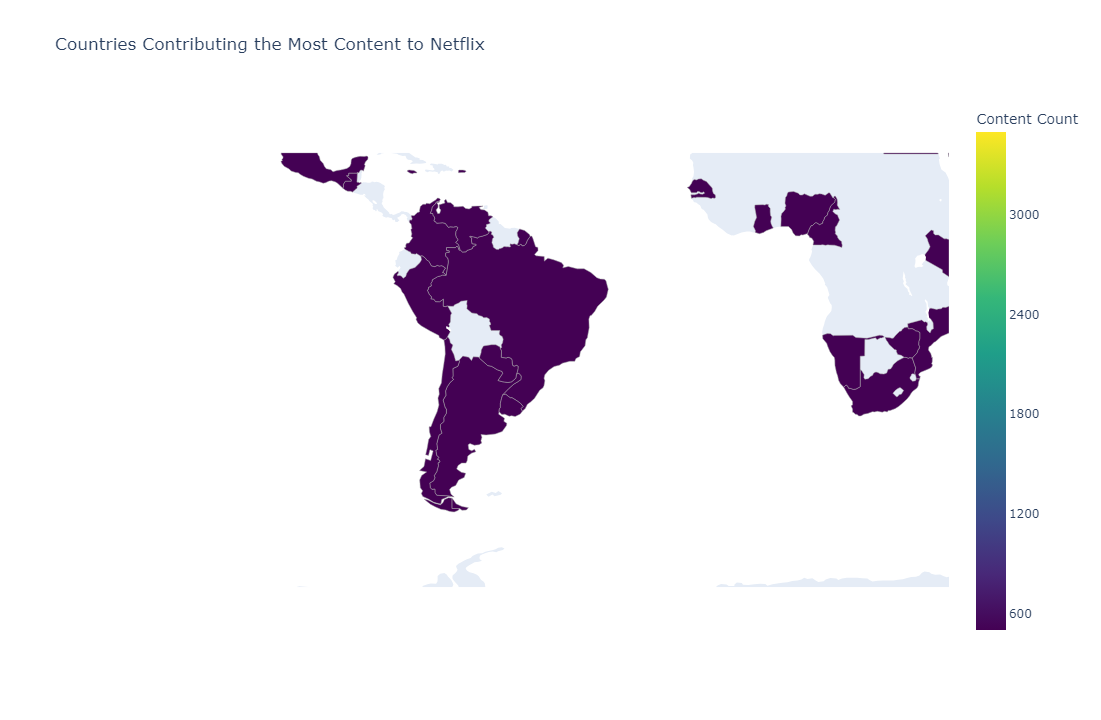

In [782]:
# Analyzing the countries that provide Netflix with the most Movies or Tv Shows.

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

most_providing_countries = unique_rows[unique_rows["country"]!="Unknown Country"]
country_counts = most_providing_countries["country"].value_counts().reset_index()
country_counts.columns = ["country", "count"]


choropleth = go.Choropleth(
    locationmode='country names',
    locations=country_counts["country"],
    z=country_counts["count"],
    colorscale='Viridis',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    zmin=500,
    zmax=3500,
    colorbar=dict(
        title='Content Count',
        tickvals=[600, 1200, 1800, 2400, 3000, 3600],
        ticktext=['600', '1200', '1800', '2400', '3000', '3600']
    )
)

layout = go.Layout(
    title_text='Countries Contributing the Most Content to Netflix',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig = go.Figure(data=[choropleth], layout=layout)
iplot(fig)


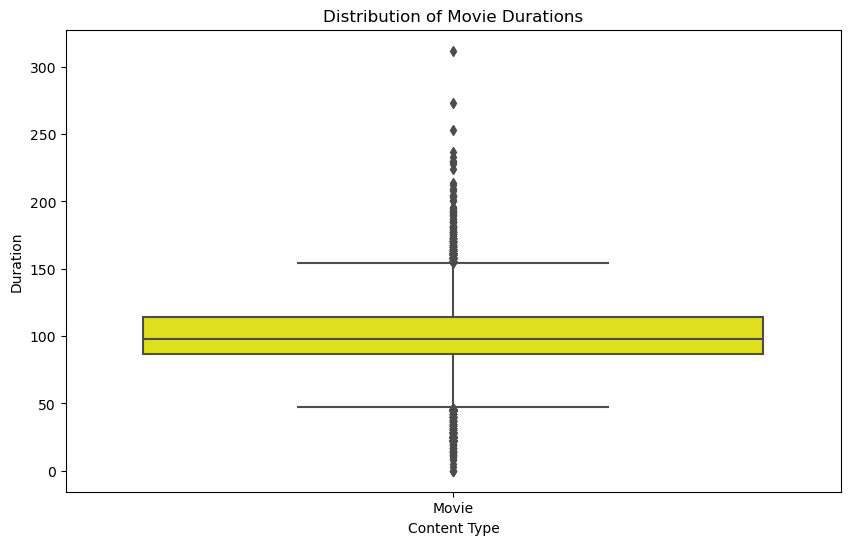

In [786]:
# Bi-Variate analysis:

# Filtering movies
unique_movies = unique_rows[unique_rows.type.str.contains("Movie")].copy()

# Extracting numeric duration and filling NaN values with 0
unique_movies.loc[:, 'duration'] = unique_movies['duration'].str.extract('(\d+)', expand=False).fillna(0).astype(int)


# Creating a boxplot for movie duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=unique_movies, x='type', y='duration', color="yellow")
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Movie Durations')
plt.show()

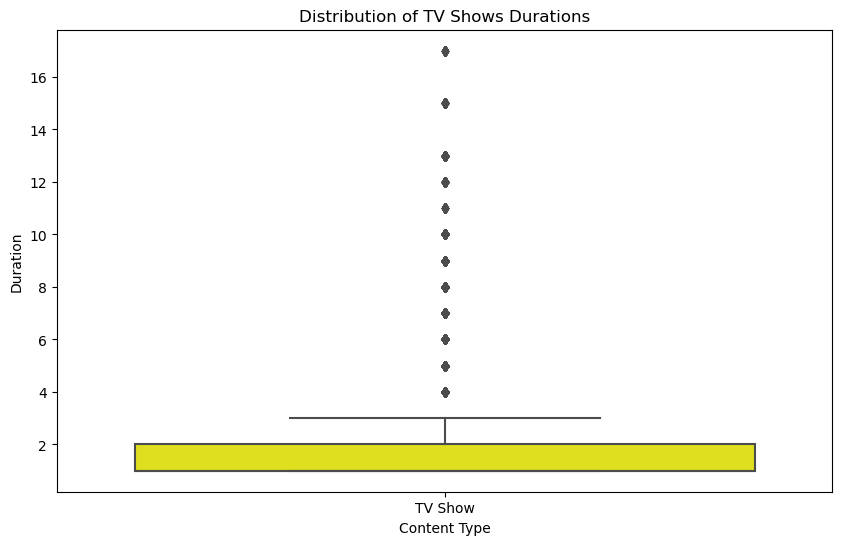

In [907]:
# Filtering TV Shows
unique_tv_shows = unique_rows[unique_rows.type.str.contains("TV Show")].copy()

# Extracting Seasons count and filling NaN values with 0
unique_tv_shows.loc[:, 'duration'] = unique_tv_shows['duration'].str.extract('(\d+)', expand=False).fillna(0).astype(int)


# Creating a boxplot for TV Show duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=unique_tv_shows, x='type', y='duration', color="yellow")
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of TV Shows Durations')
plt.show()

In [ ]:
# Analysis for above graphs
#Analysis of Movie and TV Show Durations on Netflix

After analysing the Movies box plot, we observe that the majority have a reasonable duration, typically under 150 minutes. 
This indicates that most Netflix movies are tailored to fit within a standard viewing time, with some of the outliers exceeding this length.

For TV shows, the box plot shows that most series span one to four seasons, with very few outliers extending beyond this range. 
This pattern aligns with current trends, suggesting that Netflix emphasizes shorter series formats.

In [ ]:
For correlation: Heatmaps

In [883]:
# Genre Correlation Heatmap:
#Finding the total number of Movies/TV Shows on genres wise and fetching the count

genres_unique = df[["show_id", "listed_in"]]
genres_unique = genres_unique.drop_duplicates()
genre_wise_total = genres_unique.groupby("listed_in")["listed_in"].value_counts().reset_index()
genre_wise_total

matrix = pd.get_dummies(genres_unique['listed_in'])
genre_counts = matrix.groupby(genres_unique['show_id']).sum()
total_genre_counts = genre_counts.sum().sort_values(ascending=False).to_frame().T
total_genre_counts.sum(axis=1)
correlation_matrix = genre_counts.corr()

0    19323
dtype: int64

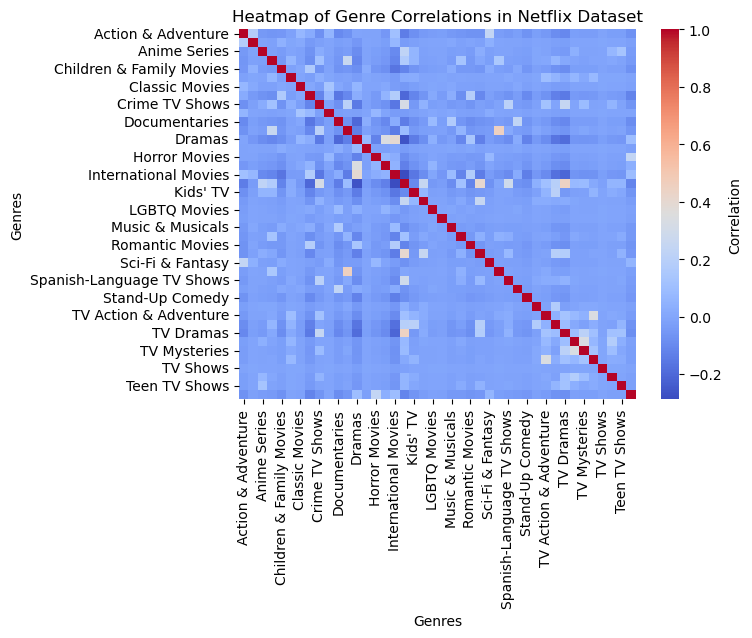

In [899]:
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title('Heatmap of Genre Correlations in Netflix Dataset')
plt.xlabel('Genres')
plt.ylabel('Genres')
plt.show()

In [901]:
The heatmap illustrates the correlations between various genres. By examining the heatmap, 
we can identify strong positive correlations between specific genres, such as TV Dramas and International TV Shows, 
as well as Romantic TV Shows and International TV Shows.

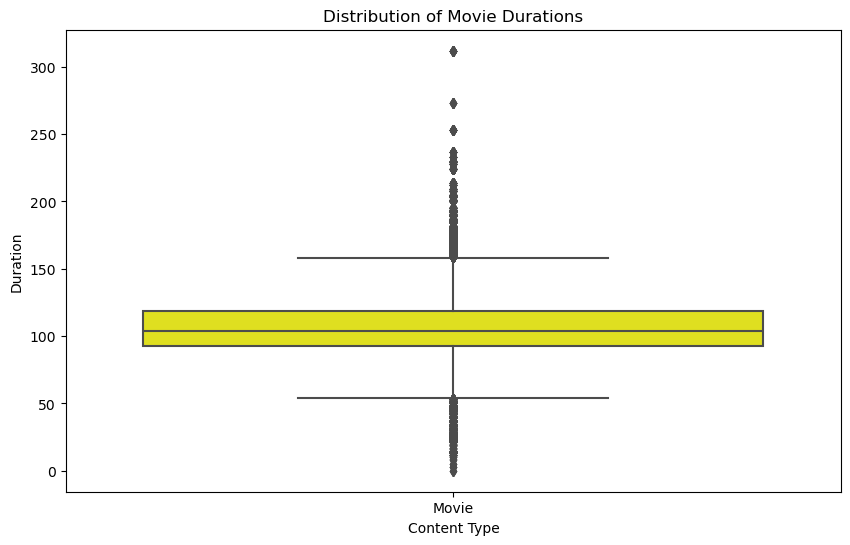

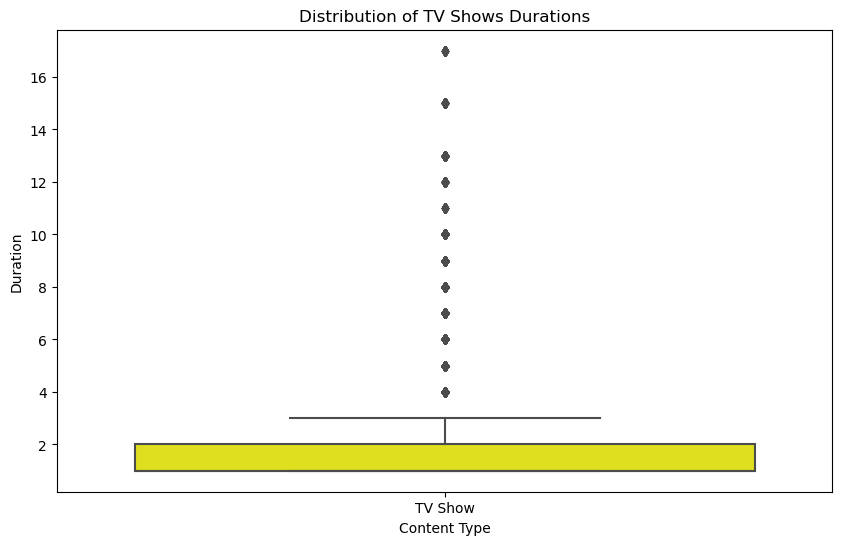

In [905]:
#Filtering Movies
unique_movies = unique_rows[unique_rows.type.str.contains("Movie")].copy()

# Extracting numeric duration and filling NaN values with 0
unique_movies.loc[:, 'duration'] = unique_movies['duration'].str.extract('(\d+)', expand=False).fillna(0).astype(int)


# Creating a boxplot for movie duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=unique_movies, x='type', y='duration', color="yellow")
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Movie Durations')
plt.show()


#Filtering TV Shows
unique_tv_shows = unique_rows[unique_rows.type.str.contains("TV Show")].copy()

# Extracting Seasons count and filling NaN values with 0
unique_tv_shows.loc[:, 'duration'] = unique_tv_shows['duration'].str.extract('(\d+)', expand=False).fillna(0).astype(int)


# Creating a boxplot for TV Show duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=unique_tv_shows, x='type', y='duration', color="yellow")
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of TV Shows Durations')
plt.show()

In [ ]:
# Analysis for above graphs

#Analysis of Movie and TV Show Durations on Netflix

After analysing the Movies box plot, we observe that the majority have a reasonable duration, typically under 150 minutes. 
This indicates that most Netflix movies are tailored to fit within a standard viewing time, with some of the outliers exceeding this length.

For TV shows, the box plot shows that most series span one to four seasons, with very few outliers extending beyond this range. 
This pattern aligns with current trends, suggesting that Netflix emphasizes shorter series formats.

In [ ]:
Missing values:
Missing values in a dataset occur when data for certain variables or observations is absent or not recorded. 
These gaps can result from errors, incomplete responses, or data issues. 
Proper handling of missing values is essential to ensure accurate analysis and modeling.

In [915]:
#We can identify missing values using 
df.isnull().any()
df.T.apply(lambda x: x.isnull().sum(), axis = 1)

# #Since I initially replaced missing values with "Unknown column_name,"  
# I later restored missing values in the `date_added` column to NaN in order to plot a continuous graph based on this field.

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added      158
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
Missing values can be handled in below ways:
i) Drop
ii) Others
iii) Unknown
iv) Imputation.
In this dataset, I,ve replace missing values with Unknown. 
Another way of handling missing values are: Deleting rows with null data, but it can result in a loss of valuable information. 
For columns with many missing values like "director," "cast," and "country," we treat these as "unavailable."
After these steps, the DataFrame no longer has missing values.


In [ ]:
Business Insights:

i) Most TV shows on Netflix have only one season, reflecting a viewer preference for shorter series.
    
ii) The months July and December are peak months for new additions on Netflix, suggesting a strategic content release strategy.
                                                
iii) The top 5 popular genres on Netflix are Dramas, Comedies, Action & Adventure, Documentaries, and International TV Shows.

iv) The frequency of content updates shows Netflix's commitment to maintaining viewer engagement through regular new additions and diverse offerings.
v) As the streaming industry evolves, recognizing these patterns and trends is crucial for navigating Netflix's extensive library 
and the dynamic landscape of content.
    
vi) Our analysis highlights that Netflix’s content library is predominantly movie-centric, with a higher addition of movies compared to TV shows.

vii) Movie durations peaked around the 1960s but have since stabilized around 100 minutes, indicating a trend in film length over time.
    
viii) There is a noticeable increase in the variety of genres over time, suggesting Netflix’s strategy to cater to diverse audience preferences.
    
ix) The evolution of ratings over the years provides insights into shifting content trends and audience reception.

In [ ]:
Recommendations:

i) Directly releasing movies with positive reviews on OTT platforms could enhance subscriptions.

ii) For TV shows, focusing on the thriller genre could be advantageous, potentially leading to more seasons.

iii) Content releases should be timed around festival holidays, year-end, and weekends to maximize viewer engagement.

iv) Netflix should also prioritize TV shows, as there is a segment of viewers who prefer them over movies.

v) Engaging with top directors can help plan and produce more movies and TV shows to boost popularity.

vi) Since many movies on OTT platforms were released in 2019, increasing the number of annual releases can attract viewers by showcasing Netflix's commitment to a steady flow of content.

vii) In addition to top directors, Netflix should consider working with directors who have fewer films but high ratings. This could address potential financial issues and provide an opportunity for high-quality content.

viii) Advertising should be intensified in countries with fewer movie releases, promoting native TV shows to attract local audiences.

ix) Targeting actors with large followings for TV shows or web series could leverage their popularity to attract more viewers.